In [127]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

data_size = 1000
X1 = torch.randn(data_size, 8)
X2 = torch.randn(data_size, 8) + 2

X = torch.cat([X1, X2], dim=0) # concatnate 合并张量

Y1 = torch.zeros(data_size, 1) # X1 - 0
Y2 = torch.ones(data_size, 1) # X2 - 1

Y = torch.cat([Y1, Y2], dim=0)


print(X.size())
print(Y.size())
print(X)
print(Y)

torch.Size([2000, 8])
torch.Size([2000, 1])
tensor([[ 1.7884,  0.8209,  0.2348,  ..., -0.8271, -0.5790,  0.6070],
        [-0.7274,  0.6992,  0.5502,  ...,  1.5163, -1.8584, -1.0624],
        [ 0.0142, -0.4635, -1.0685,  ..., -2.3389,  0.5820, -0.3593],
        ...,
        [ 1.4336, -0.2933,  1.1599,  ...,  2.4394,  2.1142,  1.7722],
        [ 2.0064,  0.5621,  2.7502,  ...,  1.6492,  1.5438,  1.3683],
        [ 2.9500,  1.2871,  1.3683,  ...,  1.6120,  3.1193,  2.7203]])
tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])


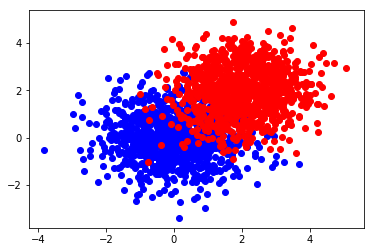

In [128]:
plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [129]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 16)
        self.relu1 = nn.ReLU()
        
        self.dout = nn.Dropout(0.2) # previous one is 0.2 
        
        self.fc2 = nn.Linear(16, 32) # can be adjusted 
        self.prelu = nn.PReLU(1)
        
        self.out = nn.Linear(32, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999)) # turing the learn rate? 
criterion = nn.BCELoss()

In [130]:
def train_epoch(model, opt, criterion, batch_size=50): # batch_size = 50
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

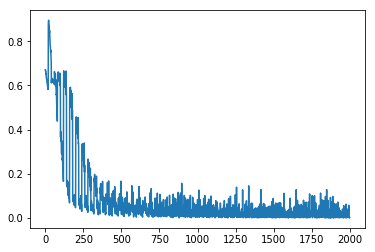

In [131]:
e_losses = []
num_epochs = 50
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [132]:
# # x_t = Variable(torch.randn(1, 8))
# # # net.eval()
# # print(net(x_t))
# # x_1_t = Variable(torch.randn(1, 8) + 2)
# # print(net(x_1_t))

# x_test = X[1]

tensor([[2.1106e-11]], grad_fn=<SigmoidBackward>)
tensor([[1.]], grad_fn=<SigmoidBackward>)
